## Abelone Age Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Variable discription:
Sex: M (male), F (female), I (infant)

Length: longest shell measurement (in mm)

Diameter: measurement perpendicular to legnth (in mm)

Height: with meat in shell (in mm)

Whole weight: the whole abalone (in grams)

Shucked weight: weight of the meat (in grams)

Viscera weight: gut weight after bleeding (in grams)

Shell weight: after being dried (in grams)

Rings: + 1.5 gives the age in years (the value to predict) 

In [3]:
data['Index'] = np.array(range(1,4178))

In [4]:
data['Index']

0          1
1          2
2          3
3          4
4          5
        ... 
4172    4173
4173    4174
4174    4175
4175    4176
4176    4177
Name: Index, Length: 4177, dtype: int32

In [5]:
data.isna().sum() #to check null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Index             0
dtype: int64

In [6]:
data.dtypes #to check the datatypes of each column in data

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Index               int32
dtype: object

##### We have 1 categorical data i.e. "Sex" 

In [7]:
data['Sex'].value_counts() #to check the gender count individually

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [8]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Index
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,2089.000000
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,1205.940366
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,1045.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,2089.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,3133.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,4177.000000


In [9]:
data['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

Here, we can see that

the minimum value of height is '0'
the maximum value of height is '1.130000'
Let's compare the heights

In [10]:
data[data['Height'] == 0] #data when the height is '0'


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Index
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1258
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,3997


In [11]:
data[data['Height'] == 1.130000] #data when the height is '1.130000'

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Index
2051,F,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8,2052



We can see that the Rings that predict the age is less than 10

We may consider, this data as an infant Abalone
Both, the minimum hight as '0' and the maximum heght as '1.13' shows the age of Infant.
So, even if we check and compare the other data like ['Whole weight Shucked weight Viscera weight Shell weight'] Shows a normal data but when compared to the minimum height'0' v/s these data, then, it shows a descripency. Hence, we are now replacing the minimum hight with the mean of the total no. of heights

In [12]:
data['Height'] = data['Height'].replace(0,data['Height'].mean()) #replacing the height '0' with mean

In [13]:
data['Height'].describe() #let's cross check height data

count    4177.000000
mean        0.139583
std         0.041715
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

### Exploratory Data Analysis

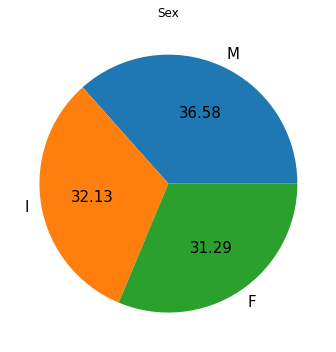

In [14]:
Gender = data['Sex'].value_counts(normalize=True)
Gender.plot(kind='pie',figsize=(5,5),title='Sex',ylabel="",autopct="%.2f",fontsize=15,)
plt.tight_layout()
plt.show()

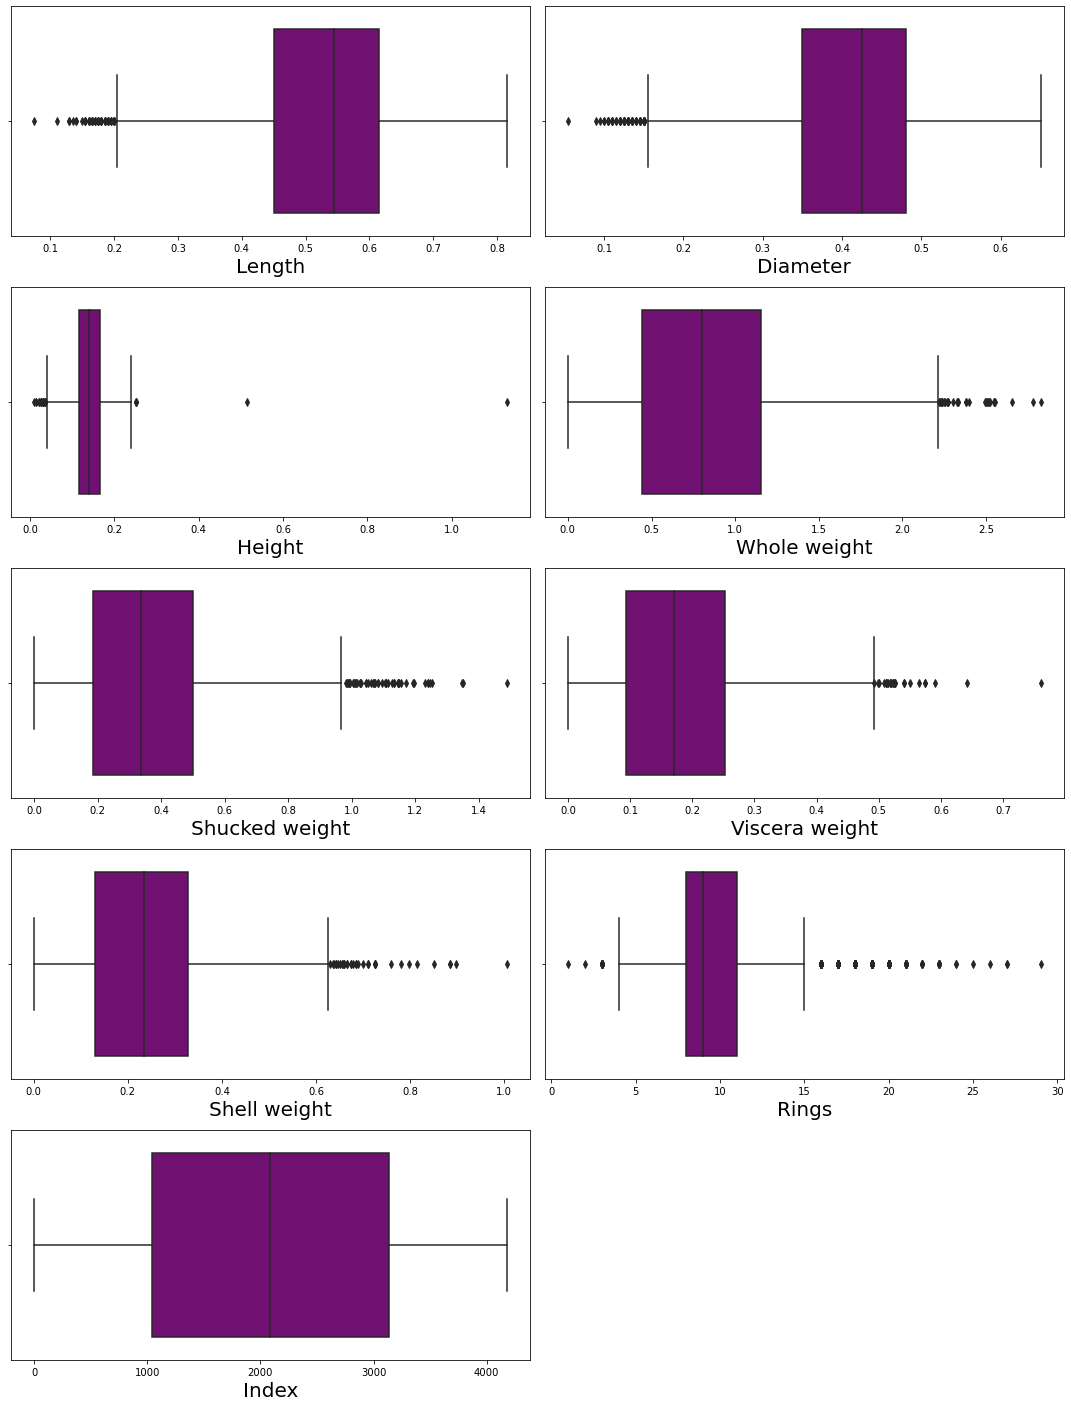

In [15]:
data1 = data.drop(columns = 'Sex')
plt.figure(figsize = (15,23))
plotnumber=1

for column in data1:
    if plotnumber<12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(data1[column],color = 'Purple')
        plt.xlabel(column,fontsize=20)
    plotnumber +=1

plt.tight_layout()


### Applying IQR Method

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

data_new1 = data1[~((data1 < (Q1-1.5*IQR)) | (data1> (Q3 + 1.5*Q3))).any(axis = 1)]

In [17]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data1.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",(data1.shape[0]-data_new1.shape[0])/data1.shape[0])

Shape - Before and After:

Shape Before         : (4177, 9)
Shape After          : (4101, 9)
Percentage Loss      : 0.01819487670576969


### Applying Z-Score Method

In [18]:
#importing libraries

from scipy.stats import zscore

In [19]:
z=np.abs(zscore(data1))
threshold = 3
data_new2 = data1[(z<3).all(axis=1)]

In [20]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data1.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",(data1.shape[0]-data_new2.shape[0])/data1.shape[0])

Shape - Before and After:

Shape Before         : (4177, 9)
Shape After          : (4029, 9)
Percentage Loss      : 0.03543212832176203


#### Correlation between features v/s features

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

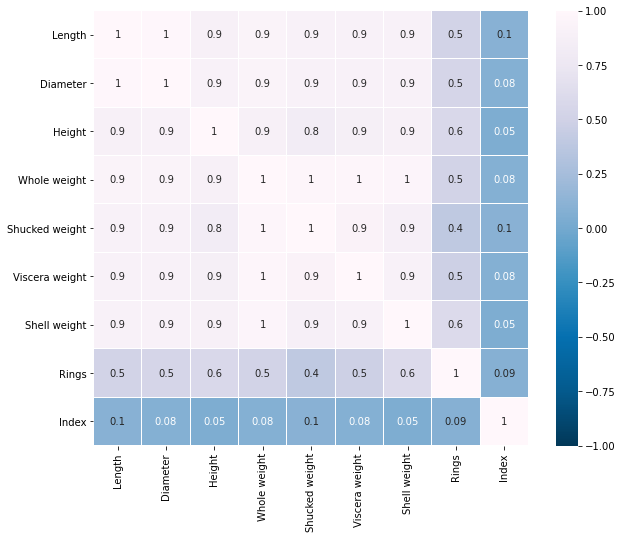

In [21]:
data_corr = data_new1.corr().abs()#to get the correlation values
plt.figure(figsize=(10,8))

sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.01,cmap = 'PuBu_r')
plt.tight_layout

In [22]:
gender = data['Sex']


In [23]:
df_new = pd.concat([data_new1, gender], axis=1, join="inner")
df_new.sample(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Index,Sex
4094,0.630,0.530,0.175,1.4135,0.6670,0.2945,0.3555,13,4095,M
817,0.350,0.270,0.090,0.2055,0.0750,0.0575,0.0620,6,818,I
3819,0.570,0.450,0.140,0.9275,0.4770,0.1605,0.2515,8,3820,M
2871,0.375,0.280,0.085,0.2145,0.0855,0.0485,0.0720,7,2872,I
2359,0.645,0.525,0.200,1.4490,0.6010,0.2565,0.5050,13,2360,F
1516,0.660,0.505,0.165,1.3740,0.5890,0.3510,0.3450,10,1517,M
358,0.745,0.585,0.215,2.4990,0.9265,0.4720,0.7000,17,359,M
2637,0.440,0.335,0.115,0.4215,0.1730,0.0765,0.1130,7,2638,I
994,0.580,0.450,0.145,1.1370,0.5585,0.2200,0.2900,8,995,F
2501,0.330,0.260,0.080,0.2000,0.0625,0.0500,0.0700,9,2502,F


In [24]:
df_new.reset_index(inplace = True) #we had applied index so that we can concat the exact data value with the exact row

In [25]:
df_new

,index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Index,Sex
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1,M
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,M
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,3,F
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,4,M
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,5,I
...,...,...,...,...,...,...,...,...,...,...,...
4096,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,4173,F
4097,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,4174,M
4098,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,4175,M
4099,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,4176,F


In [26]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()

In [27]:
df_new['Sex'] = l_enc.fit_transform(df_new['Sex'])
#data_new1['Sex'] = l_enc.fit_transform(data['Sex'])

In [28]:
df_new['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4096    0
4097    2
4098    2
4099    0
4100    2
Name: Sex, Length: 4101, dtype: int32

In [29]:
df_new

,index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Index,Sex
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1,2
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,2
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,3,0
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,4,2
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...
4096,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,4173,0
4097,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,4174,2
4098,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,4175,2
4099,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,4176,0


In [30]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [31]:
df_new['Age'] = df_new['Rings'] + 1.5 #the actual age by adding 1.5 to no.of rings

In [32]:
df_new1 = df_new.copy()
Age = []
for i in df_new1["Age"]:
    if i < 9.33:
        Age.append("1")
    if i > 9.33 and i< 18.66 :
        Age.append("2")
    if i > 18.66:
        Age.append("3")
df_new1["Age"] = Age

### Assigning
the value 1 that shows young Abalone
the value 2 that shows Adult/Medium Abalone
the value 3 that shows old Abalone

In [33]:
df_new1

,index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Index,Sex,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1,2,2
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,2,1
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,3,0,2
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,4,2,2
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4096,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,4173,0,2
4097,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,4174,2,2
4098,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,4175,2,2
4099,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,4176,0,2


### Splitting features and label 

In [34]:
X = df_new1.drop(['Age','index','Rings','Index'], axis = 1)
Y = df_new1['Age']

In [35]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4096,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4097,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4098,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4099,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


### Splitting train and test data

In [36]:
#importing libraries
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.15, random_state=5) #not applying scaled data

### MODEL BUILDING:
#### Model1: RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

Rand_C = RandomForestClassifier(random_state = 3)
Rand_C.fit(x_train,y_train)
y_pred1 = Rand_C.predict(x_test)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred1))
print('R2_Score: ',r2_score(y_test,y_pred1))

print('Accuracy Score: ',accuracy_score(y_test,y_pred1))
s1 = accuracy_score(y_test,y_pred1)

Mean_Squared_Error:  0.12824675324675325
R2_Score:  0.34163104064072725
Accuracy Score:  0.8717532467532467


In [40]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(Rand_C,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(Rand_C,X,Y,cv=3).mean())
CV1 = cross_val_score(Rand_C,X,Y,cv=3).mean()

Cross Validation Score:  [0.87271397 0.86613021 0.8683248 ]
Avg_Cross_Validation Score:  0.8690563277249451


In [41]:
confusion_matrix(y_test,y_pred1)

array([[ 77,  32,   0],
       [ 23, 460,   1],
       [  0,  23,   0]], dtype=int64)

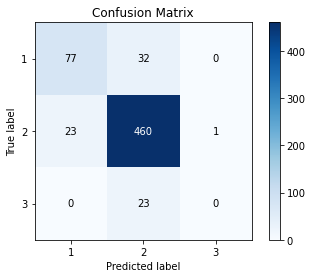

In [69]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred1)
plt.show()

### Model2: Decision Tree Classifier


In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred2 = dtc.predict(x_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred2))
print('R2_Score: ',r2_score(y_test,y_pred2))

print('Accuracy Score: ', accuracy_score(y_test,y_pred2))

s2 = accuracy_score(y_test,y_pred2)

Mean_Squared_Error:  0.18181818181818182
R2_Score:  0.06661615888305639
Accuracy Score:  0.823051948051948


In [44]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(dtc,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(dtc,X,Y,cv=3).mean())
CV2 = cross_val_score(dtc,X,Y,cv=3).mean()

Cross Validation Score:  [0.79005121 0.79224579 0.80321873]
Avg_Cross_Validation Score:  0.7990733967325042


In [45]:
confusion_matrix(y_test,y_pred2)

array([[ 72,  36,   1],
       [ 36, 428,  20],
       [  0,  16,   7]], dtype=int64)

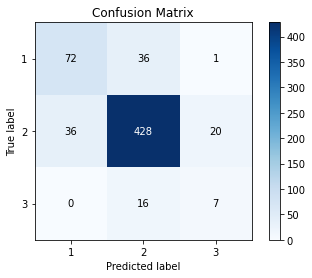

In [70]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred2)
plt.show()

### Model3: KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred3))
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

s3 = accuracy_score(y_test,y_pred3)

Mean_Squared_Error:  0.11363636363636363
Accuracy Score: 0.8863636363636364


In [49]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(knn,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(knn,X,Y,cv=3).mean())
CV3 = cross_val_score(knn,X,Y,cv=3).mean()

Cross Validation Score:  [0.86100951 0.86759327 0.86174104]
Avg_Cross_Validation Score:  0.8634479395269447


In [50]:
confusion_matrix(y_test,y_pred3)

array([[ 80,  29,   0],
       [ 19, 465,   0],
       [  0,  22,   1]], dtype=int64)

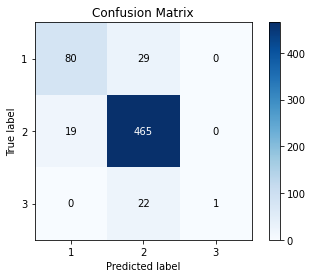

In [71]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred3)
plt.show()

### Finding Best Model

In [51]:
Overall_Score = pd.DataFrame({'Model':['Random Forest Classifier','Decision Tree','KnnClassifier'],'Accuracy_Score':[s1,s2,s3],'Cross_Validation_Score':[CV1,CV2,CV3]})

Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [52]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Random Forest Classifier,0.871753,0.869056,0.002697
1,Decision Tree,0.823052,0.796879,0.026173
2,KnnClassifier,0.886364,0.863448,0.022916


In [53]:
Overall_Score['Difference'].min()

0.002696919028301603

In [54]:
Overall_Score[Overall_Score['Difference'] == 0.002696919028301603]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Random Forest Classifier,0.871753,0.869056,0.002697


### Best Model: Random Forest Classifier
#### Hyper Parameter Tuning Using GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.ensemble import RandomForestClassifier
para_grid = {'n_estimators': range(2,50,3),
                 'max_features': ["sqrt"],
                 'max_depth': range(2,30,2)} 
clf = GridSearchCV(RandomForestClassifier(),para_grid,cv=3)

clf.fit(x_train,y_train)
print(clf.best_score_, clf.best_params_)
#y_pred_clf = Rand_clf.predict(x_test)

0.8737400691729635 {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 38}


In [78]:
model_clf = Rand_clf.best_estimator_
print(clf_rf.best_score_,clf_rf.best_params_)

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [65]:
Rand_clf = RandomForestClassifier(max_depth = 10, max_features = 'sqrt', n_estimators = 90)
Rand_clf.fit(x_train,y_train)
y_pred_clf = Rand_clf.predict(x_test)

#### Accuracy Score after tuning

In [66]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_clf)) #Accuracy Score after tuning

Accuracy Score: 0.8701298701298701


##### Classification Report after tuning

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
print(classification_report(y_test,y_pred_clf))


              precision    recall  f1-score   support

           1       0.76      0.70      0.73       109
           2       0.89      0.95      0.92       484
           3       0.00      0.00      0.00        23

    accuracy                           0.87       616
   macro avg       0.55      0.55      0.55       616
weighted avg       0.83      0.87      0.85       616



### Before Tuning

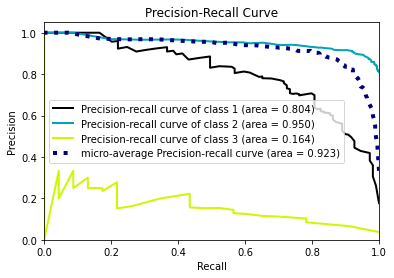

In [72]:
# This is a RandomForest classifier after tuning. We'll generate probabilities on the test set.
Rand_C.fit(x_train, y_train)
probas = Rand_C.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

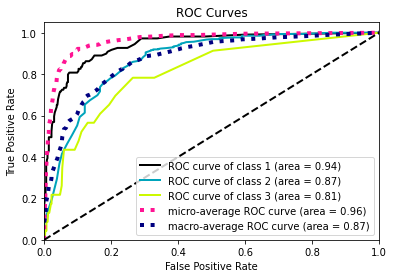

In [73]:
import matplotlib.pyplot as plt
import scikitplot as skplt

# This is a RandomForest classifier. We'll generate probabilities on the test set.
Rand_C.fit(x_train, y_train)
probas = Rand_C.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

### After Tuning

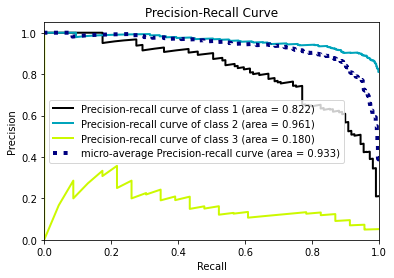

In [74]:
# This is a RandomForest classifier after tuning. We'll generate probabilities on the test set.
Rand_clf.fit(x_train, y_train)
probas1 = Rand_clf.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas1)

plt.show()


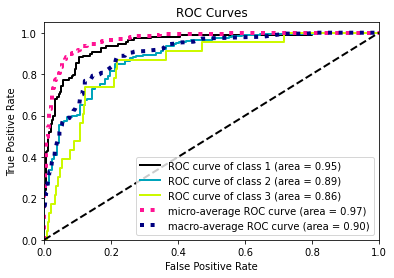

In [75]:
# This is a RandomForest classifier. We'll generate probabilities on the test set.
Rand_clf.fit(x_train, y_train)
probas1 = Rand_clf.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas1)

plt.show()

### Saving the model for future prediction:

In [76]:
import pickle

In [77]:
Abelone='Abelone_Age_PredictionReport__model.pickle'
pickle.dump(Rand_clf,open(Abelone,'wb'))
